Algorithm 1 Constructing a simplicial complex filtered by a multidimensional dissimilarity measure.

Input: Point cloud P, measure dsim, eps, maximal dimension dim
Output: Filtered complex K

(K0, K1) := graph over P weighted by dsim

Let nr(v) be the unique index of each vertex v ∈ K0.
for d = 2. . . dim do
Kd = ∅
    for each d-simplex S in Kd−1 do
        for each vertex e adjacent to any vertex of S do
            if nr(e) > maxv∈S{nr(v)} {Note that each simplex is created and added
                                    only once and that e /∈ S.} 
                then N = S ∪ e {N is a new d+1 simplex.}
                if dsim(N) ≤ eps 
                then Kd = Kd ∪ N {All faces of N are already in K. }
return K = (K0, . . . , Kdim)

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd

In [9]:
#x=lambda : rnd.gauss(0,5)
#y=rnd.randrange(0,1,100)
#x=np.array(np.arange(1,10))
#y=np.array(np.ones((1,len(x)),int)*2)
m=np.random.randint(low=1,high=6,size=(2,3))
x=m[0]
y=m[1]
print(m,x,y,sep="\n")

[[5 1 2]
 [3 4 4]]
[5 1 2]
[3 4 4]


In [12]:
def dsim(x,y):
    t=x[:,None]
    yt=y[:,None]
    q=np.sqrt((x-t)**2+(y-yt)**2)
    print(t,yt,x-t,y-yt,sep="\n")
    return q
dsim(x,y)


[[5]
 [1]
 [2]]
[[3]
 [4]
 [4]]
[[ 0 -4 -3]
 [ 4  0  1]
 [ 3 -1  0]]
[[ 0  1  1]
 [-1  0  0]
 [-1  0  0]]


array([[0.        , 4.12310563, 3.16227766],
       [4.12310563, 0.        , 1.        ],
       [3.16227766, 1.        , 0.        ]])

In [18]:

def dsim(m):
    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)
print(dsim(m))



[[0.         4.12310563 3.16227766]
 [4.12310563 0.         1.        ]
 [3.16227766 1.         0.        ]]


In [223]:
edsim=dsim(m)
edsimSort=np.unique(np.sort(np.insert(edsim.reshape(-1),[1],[5.6,7.3,9.9],0)))[1:]
edsQ3=edsimSort[3*(len(edsimSort)-1)//4]
print(edsimSort,edsQ3,sep="\n")

[1.         3.16227766 4.12310563 5.6        7.3        9.9       ]
5.6


In [306]:

ddsim=[]
for i in range(edsim.shape[0]):
  ddsim.append(np.delete(edsim[i], np.s_[i::],0))
ddsimArray=np.concatenate(ddsim[::],dtype='object')
ddIns=np.sort(np.insert(ddsimArray,[1],[5.6,7.3,9.9],0))
ddQ3=ddIns[3*(len(ddIns)-1)//4]
print(ddsimArray, ddIns,ddQ3,sep="\n")


[4.123105625617661 3.1622776601683795 1.0]
[1.0 3.1622776601683795 4.123105625617661 5.6 7.3 9.9]
5.6


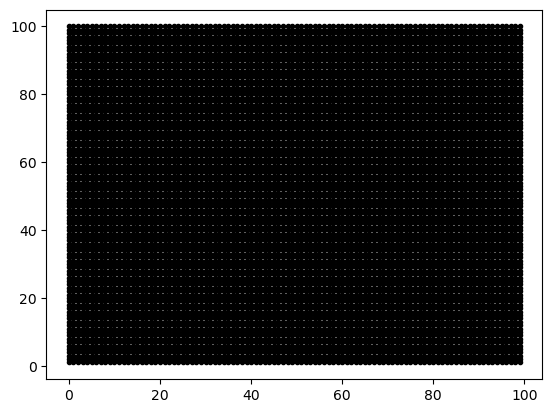

In [56]:
xray=np.linspace(1,100,100)
line=np.ones(100)
#print(xray[:,None])
plt.plot(xray*line[:,None],'k.')
plt.show()

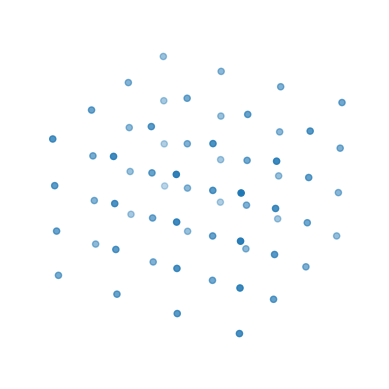

In [317]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x=np.linspace(0,100,4)
y=np.copy(x)
z=np.copy(x)

X,Y,Z=np.meshgrid(x,y,z,indexing='ij')
ax.scatter3D(X,Y,Z)
plt.axis("off")
plt.show()

0.8213266852748242
0 0
0 3
0 4
0 5
0 7
0 8
1 1
1 2
1 4
1 5
1 6
1 9
2 1
2 2
2 4
2 5
2 6
2 8
2 9
3 0
3 3
3 4
3 5
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 1
6 2
6 4
6 5
6 6
6 8
6 9
7 0
7 3
7 4
7 5
7 7
7 8
7 9
8 0
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


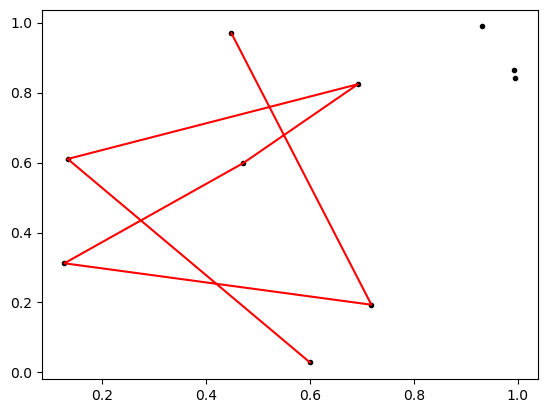

In [354]:
r=np.random.rand(2,10)
#print(r[0],r[1])
rdsim=dsim(r)
#print(rdsim)
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[3*(len(rSort)-1)//4]
print(rQ3)
plt.plot(r[0],r[1], 'k.')
splitIndex=np.array(np.where(rdsim<=rQ3), dtype='object')
izip=zip(splitIndex[0],splitIndex[1])
for (x,y) in izip:
    print(x,y) 
plt.plot(r[0][np.where(r[0]<=rQ3)],r[1][np.where(r[0]<=rQ3)],'r-')
